# Best fit quadratic equation over time

In [374]:
mergedna['otime1'] = mergedna['otime'].apply(lambda x: x)

In [375]:
mergedna['otime2'] = mergedna['otime'].apply(lambda x: x**2)

In [376]:
mergedna['otime3'] = mergedna['otime'].apply(lambda x: x**3)

In [377]:
mergedna.head()

,time,action,users,otime,otime2,otime3,otime1
0,2016-08-23,1.0,1.0,736199,541988967601,399011735958888599,736199
1,2016-08-24,3007.0,108.0,736200,541990440000,399013361928000000,736200
2,2016-08-25,421.0,25.0,736201,541991912401,399014987901528601,736201
3,2016-08-26,264.0,16.0,736202,541993384804,399016613879474408,736202
4,2016-08-27,0.0,0.0,736203,541994857209,399018239861837427,736203


In [378]:
from sklearn.preprocessing import StandardScaler

In [379]:
scaler = StandardScaler()
mergedna['otime1'] = scaler.fit_transform(mergedna['otime1'])
mergedna['otime2'] = scaler.fit_transform(mergedna['otime2'])
mergedna['otime3'] = scaler.fit_transform(mergedna['otime3'])

C:\Users\ryantm\AppData\Local\Continuum\Anaconda\lib\site-packages\sklearn\utils\validation.py:420: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\ryantm\AppData\Local\Continuum\Anaconda\lib\site-packages\sklearn\preprocessing\data.py:583: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
C:\Users\ryantm\AppData\Local\Continuum\Anaconda\lib\site-packages\sklearn\utils\validation.py:420: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\ryantm\AppData\Local\Continuum\Anaconda\lib\site-packages\sklearn\preprocessing\data.py:646: DeprecationWarning: Passi

In [380]:
mergedna.head()

,time,action,users,otime,otime2,otime3,otime1
0,2016-08-23,1.0,1.0,736199,-1.721944,-1.721877,-1.722010
1,2016-08-24,3007.0,108.0,736200,-1.701805,-1.701742,-1.701869
2,2016-08-25,421.0,25.0,736201,-1.681667,-1.681606,-1.681729
3,2016-08-26,264.0,16.0,736202,-1.661529,-1.661470,-1.661588
4,2016-08-27,0.0,0.0,736203,-1.641391,-1.641334,-1.641448


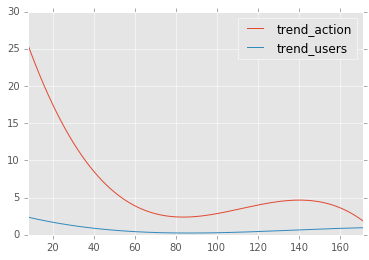

In [386]:
regression_action_poly = pd.ols(y=mergedna[8:]['action'], x=mergedna[8:][['otime1','otime2','otime3']])
regression_users_poly = pd.ols(y=mergedna[8:]['users'], x=mergedna[8:][['otime1','otime2','otime3']])

trend_action_poly = regression_action_poly.predict(beta=regression_action_poly.beta, x=mergedna[8:][['otime1','otime2','otime3']])
trend_users_poly = regression_users_poly.predict(beta=regression_users_poly.beta, x=mergedna[8:][['otime1','otime2','otime3']])
data_poly = pd.DataFrame(data={'trend_action': trend_action_poly,'trend_users': trend_users_poly, 'time': mergedna[8:]['time']})
data_poly.plot() # add kwargs for title and other layout/design aspects

In [387]:
data_poly = data_poly.merge(mergedna, how='left',left_on='time',right_on='time')

In [390]:
data_poly = data_poly.set_index('time')

In [391]:
data_poly.head()

,trend_action,trend_users,action,users,otime,otime2,otime3,otime1
time,,,,,,,,
2016-08-31,25.537069,2.371947,56.0,5.0,736207,-1.560838,-1.560789,-1.560886
2016-09-01,24.788413,2.308806,74.0,6.0,736208,-1.540699,-1.540653,-1.540746
2016-09-02,24.054537,2.246776,2.0,2.0,736209,-1.520561,-1.520517,-1.520605
2016-09-03,23.337054,2.185956,0.0,0.0,736210,-1.500423,-1.500380,-1.500465
2016-09-04,22.634352,2.126247,0.0,0.0,736211,-1.480284,-1.480244,-1.480324


# Number of unique interactions over time:

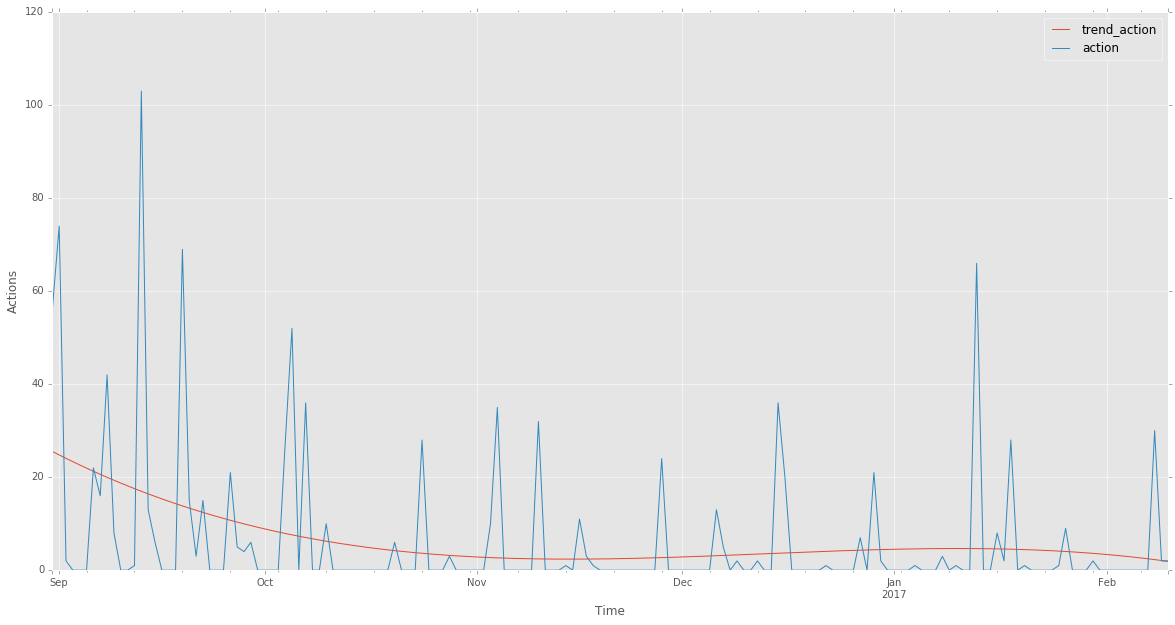

In [392]:
ax_Action = data_poly.plot(y=['trend_action','action'], figsize=(20, 10))
ax_Action.set_xlabel("Time")
ax_Action.set_ylabel("Actions")

# Number of unique users over time:

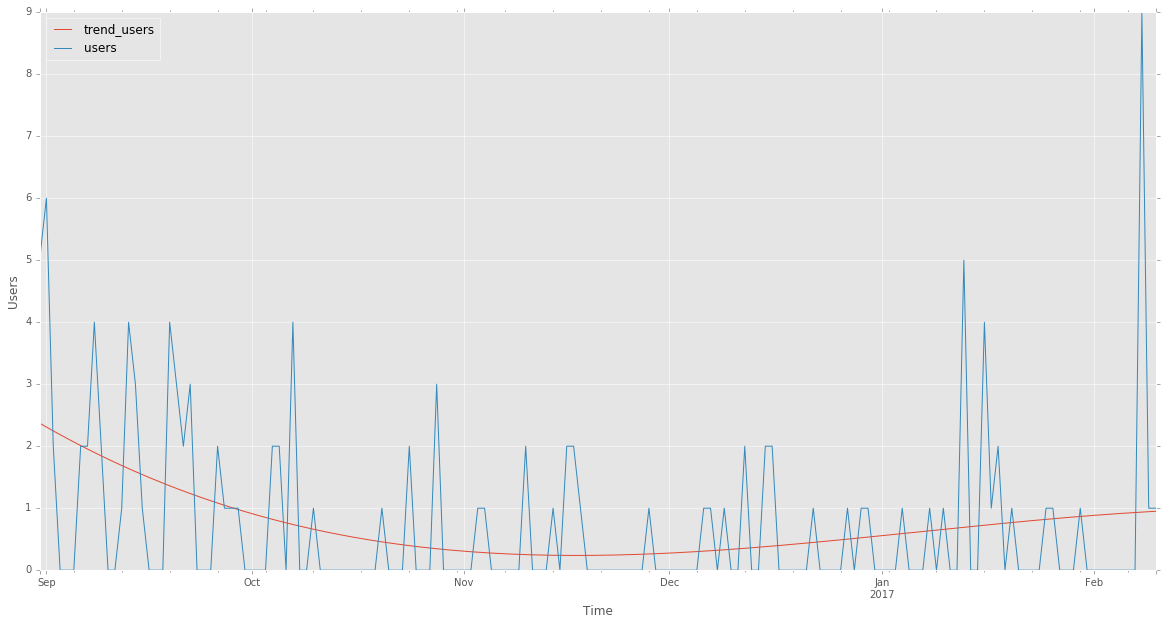

In [393]:
ax_Users = data_poly.plot(y=['trend_users','users'], figsize=(20, 10))
ax_Users.set_xlabel("Time")
ax_Users.set_ylabel("Users")

# Types of interactions:

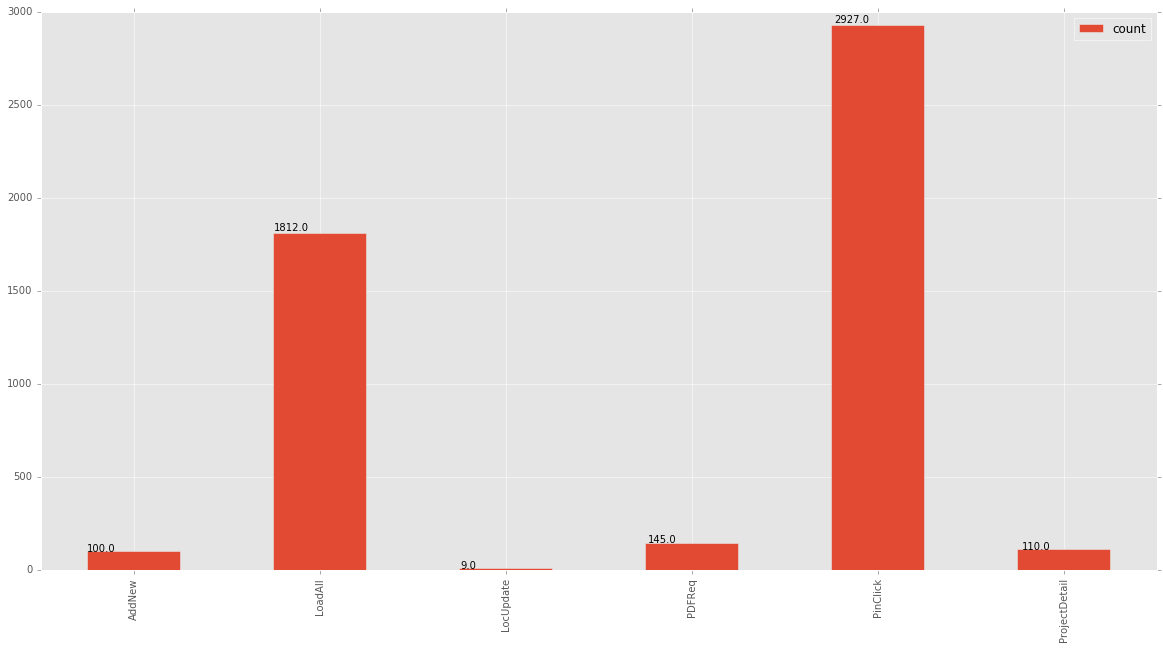

In [400]:
ax_Types = dfActionType.plot(kind='bar', x='action', figsize=(20, 10))
ax_Types.set_xlabel("")
ax_Types.set_ylabel("")
for p in ax_Types.patches:
    ax_Types.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))